 # Minerando Dados - www.minerandodados.com.br

** Bibliotecas utilizadas **

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import plotly
plotly.offline.init_notebook_mode()
import datetime

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


** Lendo o arquivo de dados e alterando o tipo data**

In [48]:
#petr4_1_2010_11_2017
dataset = pd.read_csv('WIZS3.SA.csv')

In [49]:
dataset['Date'] = pd.to_datetime(dataset['Date'])


In [50]:
dataset.head()

,Date,Open,High,Low,Close,AdjClose,Volume
0,2018-01-02,11.79,12.46,11.79,12.15,12.15,566200
1,2018-01-03,12.35,12.35,11.90,12.05,12.05,1156700
2,2018-01-04,12.12,12.24,11.83,11.95,11.95,871200
3,2018-01-05,12.04,12.13,11.86,12.12,12.12,684900
4,2018-01-08,12.12,12.18,11.90,12.07,12.07,409000


In [51]:
#variação entre o preco de abertura e fechamento
dataset['Variation'] = dataset['Close'].sub(dataset['Open'])

In [52]:
dataset.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Variation
0,2018-01-02,11.79,12.46,11.79,12.15,12.15,566200,0.36
1,2018-01-03,12.35,12.35,11.90,12.05,12.05,1156700,-0.30
2,2018-01-04,12.12,12.24,11.83,11.95,11.95,871200,-0.17
3,2018-01-05,12.04,12.13,11.86,12.12,12.12,684900,0.08
4,2018-01-08,12.12,12.18,11.90,12.07,12.07,409000,-0.05


In [53]:
dataset.describe()

,Open,High,Low,Close,AdjClose,Volume,Variation
count,71.000000,71.000000,71.000000,71.000000,71.000000,7.100000e+01,71.000000
mean,12.095915,12.303662,11.805634,12.036338,12.036338,8.910915e+05,-0.059577
std,1.047869,1.067774,1.025727,1.095953,1.095953,7.187071e+05,0.376793
min,10.240000,10.300000,10.040000,10.120000,10.120000,0.000000e+00,-1.190000
25%,11.165000,11.450000,11.000000,11.120000,11.120000,4.707500e+05,-0.280000
50%,12.100000,12.190000,11.830000,12.000000,12.000000,6.238000e+05,-0.100000
75%,13.025000,13.255000,12.815000,13.045000,13.045000,9.591500e+05,0.095000
max,13.960000,14.220000,13.780000,13.950000,13.950000,4.428700e+06,1.480000


**Visualização de dados**

In [54]:
x1=dataset.Date
y1=dataset.Close
data = [go.Scatter(x=x1, y=y1)]
#data = [go.Scatter(x=dataset.Date, y=dataset.Close)]
layout = go.Layout(
    xaxis=dict(
        range=['01-01-2018','13-04-2018'],
        title='Ano'              
    ),
    yaxis=dict(
        range=[min(x1), max(y1)],
        title='Valor da Acao'
    ))
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

**Preços de 7 dias atrás - Mostra Candlestick**

In [55]:
dataset2 = dataset.head(7)
dados = go.Candlestick(x=dataset2.Date,
                       open=dataset2.Open,
                       high=dataset2.High,
                       low=dataset2.Low,
                       close=dataset2.Close,
                       )

data=[dados]
py.offline.iplot(data,filename='grafico_candlestick')

**Candles dos ultimos 6 meses..**

In [56]:
dataset2 = dataset.head(180)
dados = go.Candlestick(x=dataset2.Date,
                       open=dataset2.Open,
                       high=dataset2.High,
                       low=dataset2.Low,
                       close=dataset2.Close,
                       )

data=[dados]
py.offline.iplot(data,filename='grafico_candlestick')

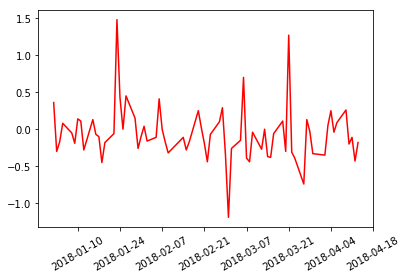

In [57]:
import matplotlib.dates as mdates
import datetime as dt
x = dataset['Date']
y = dataset['Variation']
plt.plot_date(x,y, color='r',fmt="r-")
plt.xticks(rotation=30)
plt.show()

**Correlação de Features e classe**

In [58]:
treino = dataset

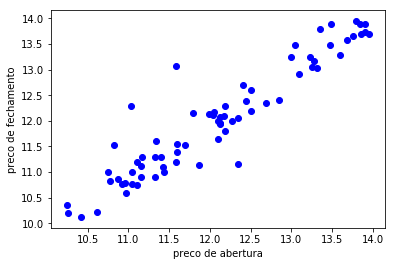

In [59]:
x = treino.Open[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('preco de abertura')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

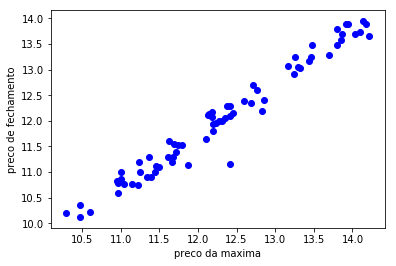

In [60]:
x = treino.High[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('preco da maxima')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

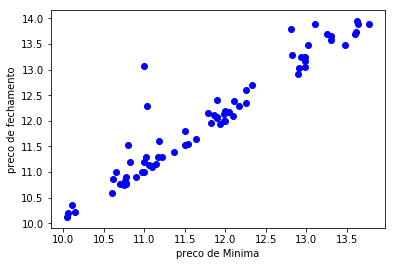

In [61]:
x = treino.Low[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('preco de Minima')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.autoscale('False')
plt.show()

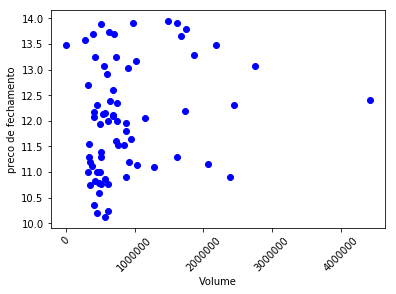

In [62]:
x = treino.Volume[:100]
y = treino.Close[:100]
plt.scatter(x,y,color='b')
plt.xlabel('Volume')
plt.ylabel('preco de fechamento')
plt.axis([min(x),max(x),min(y),max(y)])
plt.ticklabel_format(style='plain', axis='x')
plt.autoscale('False')
plt.xticks(rotation=45)
plt.show()

** Modelo **

In [98]:
features = ['Open','High','Low','Volume']
treino = treino[features]

In [99]:
treino.head()

,Open,High,Low,Volume
0,11.79,12.46,11.79,566200
1,12.35,12.35,11.90,1156700
2,12.12,12.24,11.83,871200
3,12.04,12.13,11.86,684900
4,12.12,12.18,11.90,409000


In [100]:
y = dataset['Close']

** Fazendo Predições**

In [101]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
treino, y,random_state=42)

In [102]:
X_treino.head()

,Open,High,Low,Volume
58,11.17,11.68,11.17,1623700
42,10.92,11.05,10.77,507500
16,13.05,13.80,13.02,2178600
34,13.25,13.30,12.98,560800
44,11.59,11.66,10.82,915000


In [103]:
lr_model = LinearRegression()

In [104]:
lr_model.fit(treino,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
lr_model.coef_

array([ -5.49394439e-01,   1.05729712e+00,   5.20522318e-01,
        -2.38610292e-08])

In [106]:
X_teste.head

<bound method NDFrame.head of      Open   High    Low   Volume
22  13.85  13.92  13.64   507900
0   11.79  12.46  11.79   566200
49  10.97  10.97  10.60   489700
4   12.12  12.18  11.90   409000
55  12.51  12.83  12.00  1741100
18  13.35  13.80  12.81  1753600
10  12.17  12.41  12.10   690200
33  13.23  13.26  12.98   421900
46  11.04  11.25  10.97   458600
12  12.10  12.10  11.64   942600
31  13.09  13.25  12.90   601600
9   12.05  12.18  12.05   405200
61  11.10  11.22  10.75   352200
5   12.12  12.19  11.93   504000
53  10.42  10.48  10.04   563800
30  13.31  13.32  12.91   908200
59  11.33  11.37  11.02   336200
35  12.85  12.85  11.90  4428700>

In [109]:
y_teste.head


<bound method NDFrame.head of 22    13.89
0     12.15
49    10.60
4     12.07
55    12.20
18    13.80
10    12.10
33    13.25
46    11.00
12    11.65
31    12.92
9     12.18
61    10.75
5     11.93
53    10.12
30    13.03
59    11.30
35    12.41
Name: Close, dtype: float64>

In [94]:
lr_model.predict(X_teste)[:10]

array([ 13.74557519,  12.36931655,  10.62685109,  11.9529816 ,
        12.44622785,  13.43163954,  12.26608496,  13.04689096,
        11.07777201,  11.73131767])

**Comparando os resultados - Dados da tabela**

In [95]:
y_teste[:10]

22    13.89
0     12.15
49    10.60
4     12.07
55    12.20
18    13.80
10    12.10
33    13.25
46    11.00
12    11.65
Name: Close, dtype: float64

In [97]:
lr_model.predict(X_teste)[:10]

array([ 13.74557519,  12.36931655,  10.62685109,  11.9529816 ,
        12.44622785,  13.43163954,  12.26608496,  13.04689096,
        11.07777201,  11.73131767])

**Validando o modelo**

In [110]:
RMSE = mean_squared_error(y_teste, lr_model.predict(X_teste))**0.5
RMSE

0.17184037552698708

** Da pra melhorar o modelo?**

**Teste com Open e High **

In [122]:
lr_model2 = LinearRegression()

In [126]:
features = ['Open','High','Volume']
treino2 = dataset[features]

In [127]:
y = dataset['Close']

In [129]:
treino2.head()

,Open,High,Volume
0,11.79,12.46,566200
1,12.35,12.35,1156700
2,12.12,12.24,871200
3,12.04,12.13,684900
4,12.12,12.18,409000


In [130]:
X_treino, X_teste, y_treino, y_teste = train_test_split(
treino2, y, test_size=0.33, random_state=42)

In [131]:
lr_model2.fit(treino2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
lr_model2.coef_

array([ -2.73602746e-01,   1.29631819e+00,  -1.49379283e-07])

In [133]:
RMSE = mean_squared_error(y_teste, lr_model2.predict(X_teste))**0.5
RMSE

0.16762433545024794

In [118]:
lr_model2.predict(X_teste)[:10]

array([ 13.68750713,  12.50239057,  10.69414798,  11.96283385,
        12.36236423,  13.39796453,  12.20262912,  13.02924509,
        11.08885152,  11.69926327])

In [121]:
y_teste[:10]

22    13.89
0     12.15
49    10.60
4     12.07
55    12.20
18    13.80
10    12.10
33    13.25
46    11.00
12    11.65
Name: Close, dtype: float64

**Confira o artigo na integra em: www.minerandodados.com.br**